In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("../reuters_lowresource_bunch_of_models.csv")
df

,Unnamed: 0,test_name,acc,ductive,seed,unlabeled_amount,labeled_amount
0,0,1 layer GCN weighted,0.798,trans,0,1000,400
1,1,2 layer GCN weighted,0.797,trans,0,1000,400
2,2,2 layer GCN unweighted,0.888,trans,0,1000,400
3,3,2 layer GCN unweighted no EMBED,0.890,trans,0,1000,400
4,4,4 layer GCN unweighted,0.777,trans,0,1000,400
...,...,...,...,...,...,...,...
114,114,2 layer GCN weighted,0.786,trans,6,1000,400
115,115,2 layer GCN unweighted,0.879,trans,6,1000,400
116,116,2 layer GCN unweighted no EMBED,0.886,trans,6,1000,400
117,117,4 layer GCN unweighted,0.774,trans,6,1000,400


In [36]:
from matplotlib import cm
model_count = len(df["test_name"].unique())
cmap = cm.get_cmap('gist_stern')
color_mapping = {model : cmap(i/model_count) for i, model in enumerate(df["test_name"].unique())}

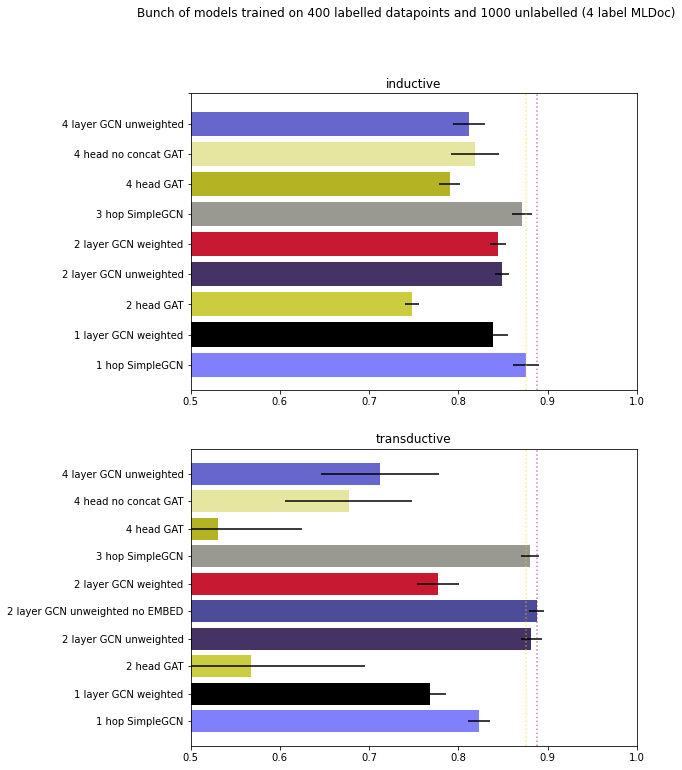

In [37]:
fig, axes = plt.subplots(2, figsize=(8, 12))

fig.suptitle("Bunch of models trained on 400 labelled datapoints and 1000 unlabelled (4 label MLDoc)")

for i, (ductive, i_df) in enumerate(df.groupby("ductive")):
    axes[i].set_title(ductive+"ductive")
    
    names = []
    means = []
    for j, (name, j_df) in enumerate(i_df.groupby("test_name")):
        mean = j_df["acc"].mean()
        std = j_df["acc"].std()
        axes[i].barh(y=j, width=mean, xerr=std, color=color_mapping[name])
        names.append(name)
        
        means.append(mean)
        
    axes[i].set_yticks(range(model_count))
    axes[i].set_yticklabels(names)
    axes[i].set_xlim((0.5, 1))
    
    line_color = "gold" if ductive == "in" else "purple"
    axes[0].axvline(max(means), linestyle=":", alpha=0.5, color=line_color)
    axes[1].axvline(max(means), linestyle=":", alpha=0.5, color=line_color)